In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def market_update( S_m , p ,delta ):
    U = np.random.rand()
    if U < p :
        S_m_new = S_m * np.exp(delta)
    else:
        S_m_new = S_m * np.exp(-delta)
    
    return S_m_new

def pool_update( S_p , S_m_new , gamma ):
    if S_m_new > gamma**-1*S_p :
      
        S_p_new =  gamma*S_m_new 
    
    elif S_m_new < gamma*S_p :
        S_p_new =  gamma**-1*S_m_new
    
    else:
        S_p_new = S_p
   
    return S_p_new

In [37]:
def pool_process( T , p , delta , gamma ):
    S_p = np.zeros(T+1)
    S_m = np.zeros(T+1)
    S_p[0]=1
    S_m[0]=1
    for i in range(T):
        S_m[i+1] = market_update( S_m[i] , p ,delta )
        S_p[i+1] = pool_update( S_p[i] , S_m[i+1] , gamma )
    return S_p , S_m

In [75]:
delta = 1
k=5
gamma = np.exp(-k*delta)
T= 1000
S_p , S_m = pool_process( T , 0.6 , delta , gamma )

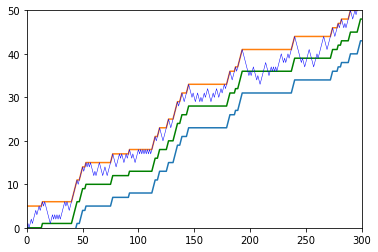

In [39]:
plt.figure()
T_array=np.arange(T+1)
plt.plot(T_array, np.log(S_p) ,'g' , label='pool')
plt.plot(T_array, np.log(gamma*S_p) , label='pool lower')
plt.plot(T_array, np.log(S_p*(gamma**-1)))
plt.plot(T_array, np.log(S_m) , 'b',linewidth=0.5)
plt.xlim(0,300)
plt.ylim(0,50)
plt.show()

In [3]:
def position(P_a,P_b,L,S_p):
    X =L * (np.sqrt(S_p) - np.sqrt(P_a) )
    Y = L * (1/np.sqrt(S_p) - 1/np.sqrt(P_b))
    if S_p > P_b :
        X = L * (np.sqrt(P_b) - np.sqrt(P_a) )
        Y = 0
    elif S_p < P_a :
        X = 0
        Y = L * (1/np.sqrt(P_a) - 1/np.sqrt(P_b))
    return X,Y
position(10,100,5,2)

(0, 1.0811388300841898)

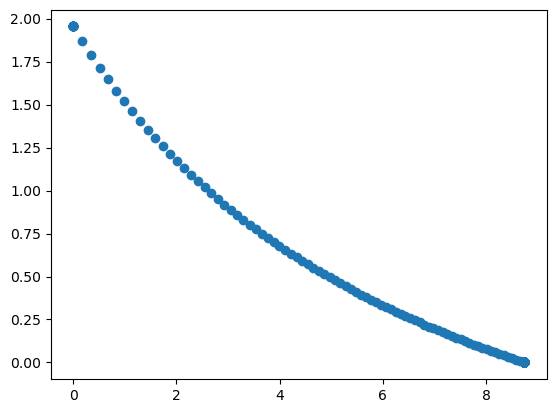

In [57]:
# An example of position curve 
X =np.array( [position(2,10,5,s/10 )[0] for s in range(1,1000)] )
Y = np.array( [position(2,10,5,s/10 )[1] for s in range(1,1000)] )
plt.scatter( X , Y )

In [58]:
def position_value(P_a,P_b,L,S_p , S_m):
    return position(P_a,P_b,L,S_p)[0]+ S_m*position(P_a,P_b,L,S_p)

In [23]:
#without scaling assumption
def fee_collecting( P_a,P_b , gamma ,  L , S_p_old , S_p_new , S_m_new ):
    A = max(S_p_old , P_a)
    B = min(S_p_old , P_b)
    fee = 0
    if S_p_old < P_b :
        if S_p_new > A :
            
            fee = L*(1-gamma)/gamma *( np.sqrt( min( S_p_new , P_b) ) - np.sqrt( A ))
            print("forward fee" , fee)
            
    if S_p_old > P_a :
        if S_p_new < B :
            fee = L*(1-gamma)/gamma *S_m_new*( 1/np.sqrt( max( S_p_new , P_a) ) - 1/np.sqrt( B ))
            print("backward fee" , fee)
    return fee

In [80]:
fee_collecting( P_a = 2.3 , P_b = 5 , gamma = gamma ,  L = 1 , S_p_old = 2.2 , S_p_new = 5 , S_m_new = 5 )

forward fee 106.06271967355472


106.06271967355472

0.006737946999085467

In [61]:
def fee_process(P_a,P_b , gamma ,  L , S_p , S_m) :
    # time 0 ~ T
    T = len(S_p) - 1
    F = np.zeros(T+1)
    t= 1
    # run from 1 ~ T
    while t >0 and t <= T:
        fee = fee_collecting( P_a , P_b , gamma ,  L , S_p[t-1] , S_p[t] , S_m[t] )
        F[t] = F[t-1] + fee
        if fee != 0 :
            print(t)
        t = t+1
    return F     

In [89]:
fee_process(1,5 , gamma ,  1 , S_p , S_m)

forward fee 95.63005189094359
6
forward fee 86.58263353783299
7


array([  0.        ,   0.        ,   0.        , ..., 182.21268543,
       182.21268543, 182.21268543])

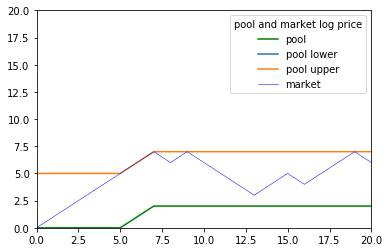

In [92]:
plt.figure()
T_array=np.arange(T+1)
plt.plot(T_array, np.log(S_p) ,'g' , label='pool')
plt.plot(T_array, np.log(gamma*S_p) , label='pool lower')
plt.plot(T_array, np.log(S_p*(gamma**-1)) , label='pool upper' )
plt.plot(T_array, np.log(S_m) , 'b',linewidth=0.5 , label='market')
plt.legend(title="pool and market log price")
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

In [91]:
np.log(S_p[5])

0.0